In [1]:
from neuron import h,gui
import numpy as np
from neuron.units import mV,ms,um
import matplotlib.pyplot as plt
import os
import pandas as pd
import stim
from savedata import saveparams, save_es, savedata, saveplot
import all_voltages
import record_voltages_gpt

# import load_files
h.load_file("stdrun.hoc")
h.load_file("interpCoordinates.hoc")
h.load_file("setPointers.hoc")
h.load_file("calcVe_noGUI.hoc")
h.load_file("cellChooser.hoc")
h.load_file("setParams.hoc")
h.load_file("editMorphology.hoc")
h.load_file("plot_max.hoc")
h.load_file("field.hoc")



	1 


1.0

In [2]:
cell_id=16
CF=5000
amp=200
filtered=False
var="cfreq"
data_dir = "C:\\Users\\Pc\\Documents\\Charite\\NEURON\\Data_processing"
bot_dir=os.path.join(data_dir,str(cell_id),var)

In [3]:
h.setParamsAdultHuman()
h.myelinate_ax=1
h.cell_chooser(cell_id)
cell_name = h.cell_names.o(cell_id-1).s  # `.s` converts HOC String to Python string
cell=h.cell
theta=180
phi=0
h.theta = theta
h.phi = phi
h.stim_mode=2
h.getes()

	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L5_TTPC2_cADpyr232_1
numSect was 417
Created List of SectionRefs for 417 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 2)
Myelinating axon: Replacing 203 Axonal sections w/ 357 Myelin, 357 Node, 42 Unmyelin sections
Adding myelin before the 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 970
Created List of SectionRefs for 970 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 2448 compartments
Got main axon (method 2)
Cell Loaded
Calculated potentials for theta = 180 deg, phi = 0 deg


0.0

In [4]:
from maxshift_plot import assign_v_values
cell,min_value,max_value,max_segments,max_seg=assign_v_values(bot_dir,CF,amp,filename="pshift",cell=cell,max_shift=None,filtered=filtered)
ps=h.PlotShape(True)
print(max_seg)
print(min_value,max_value)


<class 'str'>
7
['cADpyr232_L5_TTPC2_8052133265[0].soma[0](0.5)', 'cADpyr232_L5_TTPC2_8052133265[0].axon[0](0.0714286)', 'cADpyr232_L5_TTPC2_8052133265[0].axon[0](0.214286)', '...', 'Unmyelin[39](0.5)', 'Unmyelin[40](0.5)', 'Unmyelin[41](0.5)']
Loaded 2448 max_shift values.
Total segments in cell: 2448
Seg list incomplete, generating new one!
Min Value:9.595043182373047
Max Value:124.25678634643555

[2316]
Node[267](0.5)
9.595043182373047 124.25678634643555


In [5]:
from maxshift_plot import scale_diams
scale=3
cell=scale_diams(cell,scale=scale)

In [ ]:
# from maxshift_plot import create_e_field_vector
# len_um=800
# sElec=create_e_field_vector(theta,phi,len_um,ps)
sElec_list = h.SectionList()
# sElec_list.append(sec=sElec)

Node[267](0.5)


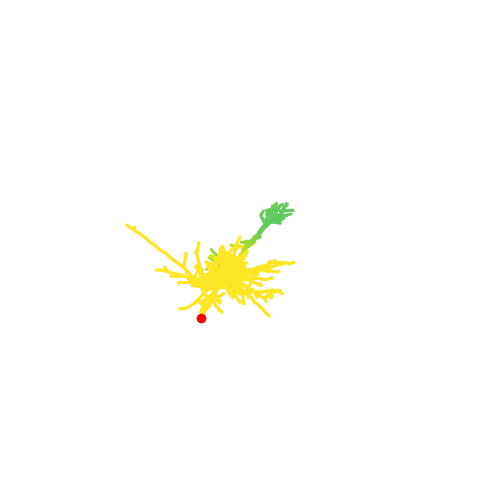

NameError: name 'sElec_list' is not defined

: 

In [ ]:
from maxshift_plot import mark_highest_v
shape,fig=mark_highest_v(cell,max_seg,max_value,min_value)
# Store in SectionList for visualization

shape.color_list(sElec_list,2)
shape.exec_menu("Plot Shape")

figname="Cell1"
savefig=False
if savefig:
        plt.savefig(figname+'.eps', format='eps')


In [ ]:
ps.variable("v")
ps.scale(min_value,max_value)
ps.exec_menu("Shape Plot")
ps.exec_menu('Show Diam')
ps.exec_menu('View = plot')
ps.show(0)

# ps.size(-800, 800, -800, 800)  # Adjust X and Y limits
# ps.view(-1000, -1000, 2000, 2000, 100, 100, 800, 800)  # Zoom out
# ps.view(-416.826, -486.465, 813.145, 959.13, 151, 52, 559.68, 660.16)
path=os.path.join(data_dir,str(cell_id),"shape_voltages.eps")



#Cell 6 and 16
# scale=3
# for sec in sElec_list:
#     if 'soma' not in sec.name():
#         for i in range(sec.n3d()):
#             d = sec.diam3d(i)
#             sec.pt3dchange(i, d * scale)
            
# ps.color_list(sElec_list,4)
# ps.printfile(path)

# fatten the lines in the image to make it easier to see
lines = []
with open(path) as f:
    for line in f:
        line = line.strip()
        if line == '0 setlinewidth':
            line = '5 setlinewidth'
        lines.append(line)
# now rewrite the file with the thicker linewidth
with open(path, 'w') as f:
    for line in lines:
        f.write(line + '\n')
# # now convert it to a png
# png_filename = os.path.join(data_dir,str(cell_id),"shape_voltages.png")
# os.system('convert %s -crop 558x660+0+0 %s' % (path, png_filename))

import subprocess

# Set file paths
eps_file = path
png_file = eps_file.replace(".eps", ".png")

# Use Ghostscript to convert EPS to PNG
gs_command = [
    "gswin64c",  # Use "gs" for Linux/macOS, "gswin64c" for Windows
    "-dNOPAUSE", "-dBATCH", "-sDEVICE=pngalpha",
    "-r300",  # Resolution (DPI)
    f"-sOutputFile={png_file}", eps_file
]

# Run the command
subprocess.run(gs_command, check=True)

print(f"Converted {eps_file} to {png_file}")

In [ ]:
from maxshift_plot import plot_maxshift
fig,cell,shape_plot=plot_maxshift(bot_dir,cell,max_value,min_value,max_seg,mark=False,sElec_list=sElec_list,scale=1)
# shape_plot.color_list(sElec_list,4)
# shape_plot.show(1)  # Refresh the plot after setting the color

# fig.show()


In [ ]:
from maxshift_plot import plot_voltage_distribution
figname=f"voltage_plot_{cell_id}"
plot_voltage_distribution(cell,list=sElec_list,ticklabels=True,savefig=False,figname=figname)